# Report Analysis
Save figures where possible using ```plt.savefig('image.png')```

Image ideas:
* Accuracy vs Partition number : performance 
* Runtime vs Partition number : speed
* Accuracy vs Runtime : trade-off
* Speed-up : scalability against serial implementation
* Confusion Matrices 
* (potentially Size-up / Scale-up)

Ensure the evaluation metrics identified in lit review reflect this. 

In [33]:
import os
import json
import pandas as pd

def load_combined_report_dataframe(json_filename="report.json"):
    # Use relative path (assumes same directory)
    json_path = os.path.join(os.getcwd(), json_filename)

    with open(json_path, "r") as f:
        all_reports = json.load(f)

    records = []

    for key, report in all_reports.items():
        try:
            row_data = {}

            # Merge all relevant sections
            row_data.update(report.get("performance", {}))
            row_data.update(report.get("timing", {}))
            row_data.update(report.get("complexity", {}))

            row_data["iteration"] = int(key)  # add the loop index for row label
            records.append(row_data)
        except Exception as e:
            print(f"Error processing report {key}: {e}")

    df = pd.DataFrame(records).set_index("iteration").sort_index()
    return df

df1 = load_combined_report_dataframe('report1.json')
df2 = load_combined_report_dataframe("report2.json")
df_list = [df1, df2]
df1.head()

FileNotFoundError: [Errno 2] No such file or directory

In [ ]:
def tot_time_col(df) -> pd.DataFrame:
    df['Total_Time'] = df['Ingestion_time'] + df['Preprocessing train data_time'] + df['Training_time'] + df['Preprocessing test data_time'] + df['Prediction_time']  
    return df


df1 = tot_time_col(df1)
df2 = tot_time_col(df2)

FileNotFoundError: [Errno 2] No such file or directory: 'metrics.png'

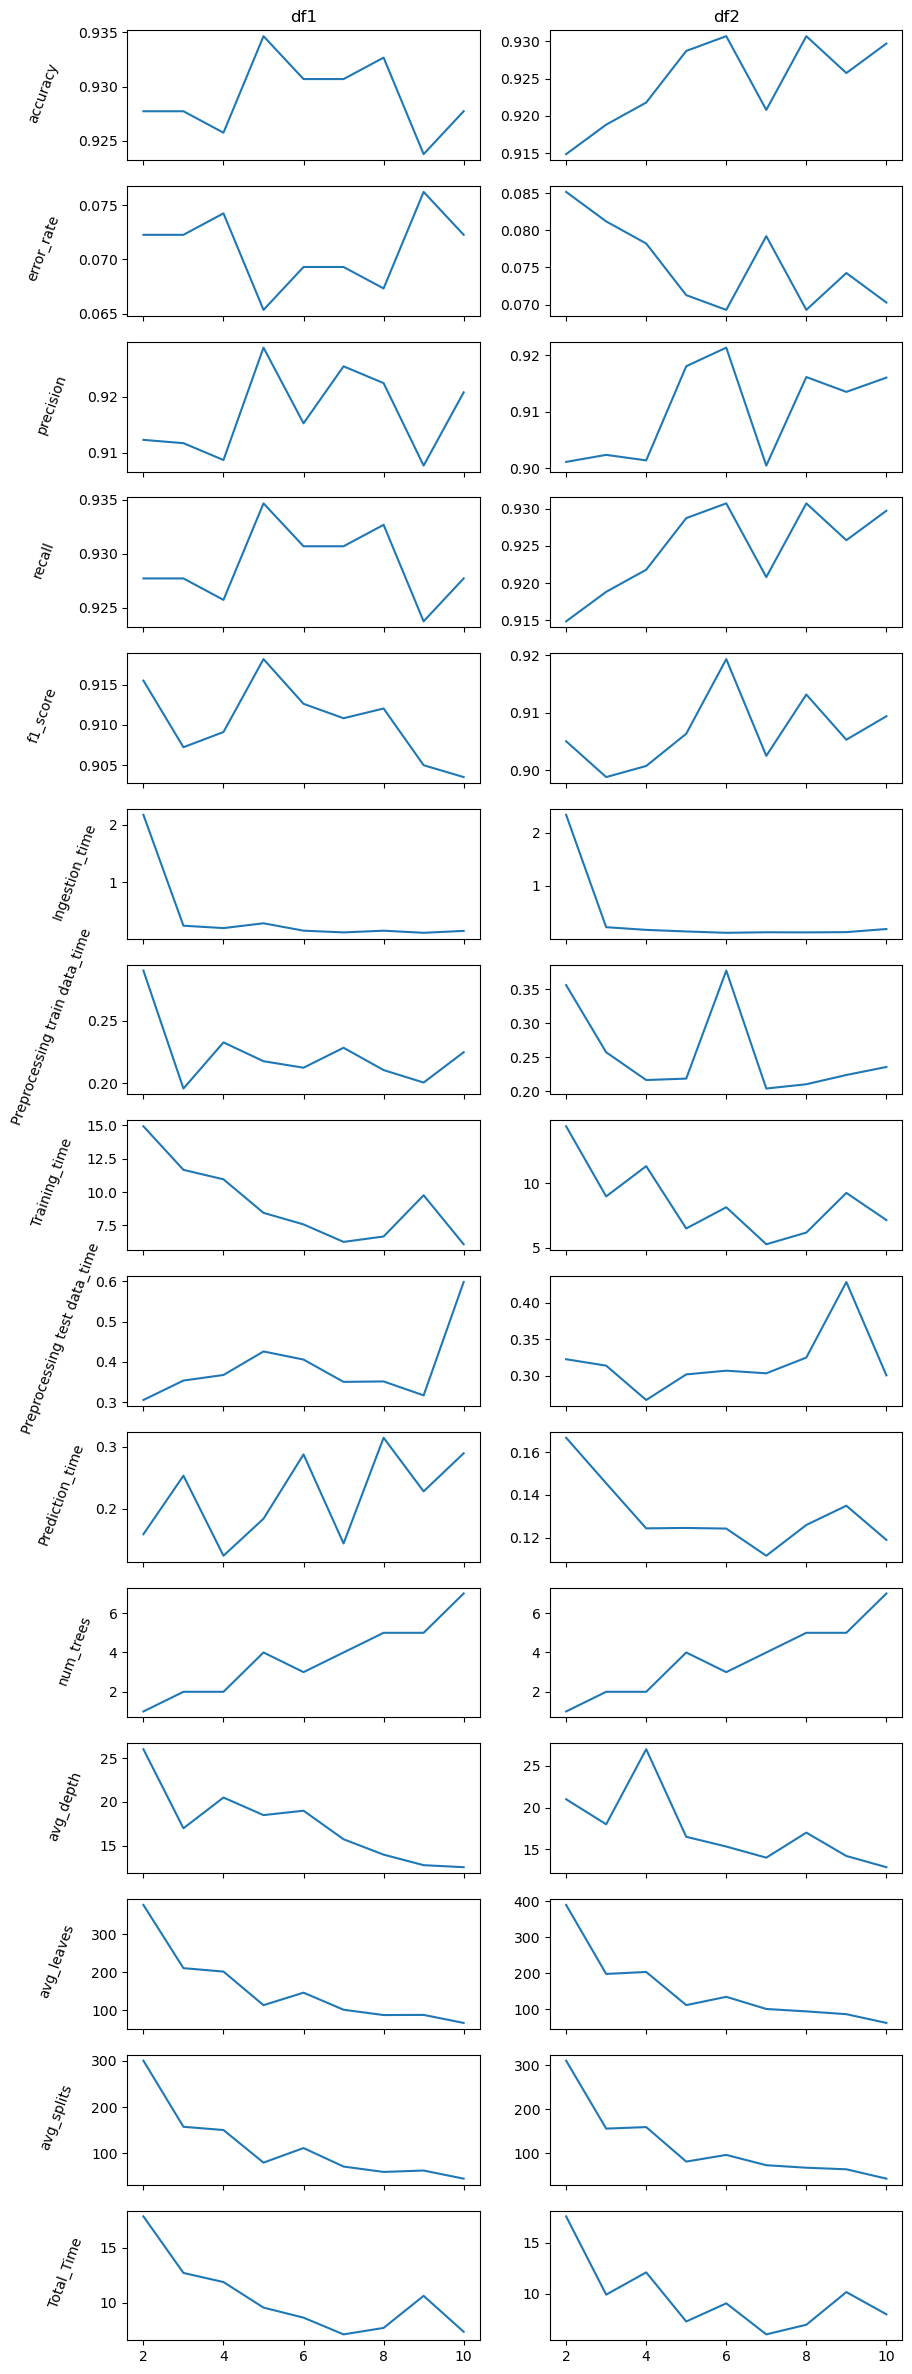

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=len(df_list[0].columns), ncols=len(df_list), sharex=True, figsize=(len(df_list) * 5, len(df1.columns) * 2))

for j, df in enumerate(df_list):
    for i, col in enumerate(df.columns):
        vals = df[col]
        ax[i, j].plot(vals.index, vals.values)
        if j == 0:
            ax[i, j].set_ylabel(col, rotation=70, labelpad=20)
        if i == 0:
            ax[i, j].set_title(f"df{j+1}")
    
plt.savefig(f'metrics.png', dpi=300, bbox_inches='tight')